# Analysez des données de systèmes éducatifs

## Importation des libraries utilisé dans le projet 

In [1]:
# Librairies principales
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Sommaire

- [Partie 1](#Partie1)
  - Étape 1 : Chargez les données  
  - Étape 2 : Collectez des informations basiques sur chaque jeu de données  
  - Étape 3 : Réalisez votre premier nettoyage  

- [Partie 2](#Partie2)
  - Étape 1 : Réduisez le périmètre en utilisant une approche métier  
  - Étape 2 : Réduisez le périmètre en utilisant une approche data  
  - Étape 3 : Consolidez vos résultats dans un dataframe (pays, indicateurs)  

- [Partie 3](#Partie3)
  - Étape 1 : Identifiez les indicateurs redondants d’un point de vue statistique  
  - Étape 2 : Analysez vos indicateurs restants et formulez une liste de pays pertinents pour l’implantation d’une academy  
  - Étape 3 : Formalisez vos résultats  
  - Étape 4 : Rendez vos analyses et vos résultats reproductibles par vos collègues  

## Partie 1 [⬆️ Retour au sommaire](#Sommaire)

### Importation des jeux donnée

In [3]:
    df = pd.read_csv("EdStatsCountry.csv")
    df2 = pd.read_csv("EdStatsCountry-Series.csv")
    df3 = pd.read_csv("EdStatsData.csv")
    df4 = pd.read_csv("EdStatsFootNote.csv")
    df5 = pd.read_csv("EdStatsSeries.csv")

### Étape 1 : Chargez les données  


Nous avons cinq données que nous allons charger pour voir ce qu’elles contiennent.  
Ces données sont :

- **EdStatsCountry.csv**
- **EdStatsCountry-Series.csv**
- **EdStatsData.csv**
- **EdStatsFootNote.csv**
- **EdStatsSeries.csv**


#### Donnée 1 EdStatsCountry.csv


In [356]:
# afficher les 5 premières lignes
df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


Se qu'on peux remarquer dans se tableau sont:
Ce tableau fournit des informations générales et statistiques sur chaque pays.

- `Country Code` : le code ISO à trois lettres qui identifie chaque pays
- `Short Name` : le nom court utilisé pour désigner le pays
- `Long Name / Table Name`: le nom officiel complet du pays
- `2-alpha code` : le code ISO à deux lettres
- `Currency Unit` : la monnaie utilisée dans le pays
- `Region` : la zone géographique à laquelle le pays appartient
- `Income Group` : le niveau de revenu du pays (ex. : *Low income*, *High income*)
- `IMF data dissemination standard` : indique la qualité du partage des données économiques selon le FMI
- `Latest population census` : année du dernier recensement de population
- `Latest trade data` : année des dernières données commerciales disponibles
- `Unnamed: 31` : probablement une colonne vide ou non renseignée


Remarque : ce tableau est utile pour **filtrer les pays selon leur niveau de données disponibles ou leur profil économique**.


#### Donnée 2 EdStatsCountry-Series.csv


In [357]:
# afficher les 5 premières lignes
df2.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Se qu'on peux voir dans se tableau sont:

- `CountryCode` : code ISO du pays 
- `SeriesCode` : identifiant de l’indicateur 
- `DESCRIPTION` : source ou méthode de calcul 
- `Unnamed: 3` : colonne vide 

Remarque : ce tableau permet de **comprendre quels indicateurs sont disponibles pour chaque pays**.



#### Donnée 3 EdStatsData.csv


In [358]:
# afficher les 5 premières lignes
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se qu'on peut voir dans se tableau sont: 
Chaque ligne représente un indicateur d'inscription scolaire pour une région (ici : Arab World), sur une série d'années.
- `Country Name` : nom du pays ou de la région 
- `Country Code` : code ISO 
- `Indicator Name` : nom de l’indicateur 
- `Indicator Code` : identifiant de l’indicateur 
- `Colonnes de dates` (1970 à 2090) 
Remarque : la majorité des valeurs sont manquantes (`NaN`), ce qui limite l’analyse directe.


#### Donnée 4 EdStatsFootNote.csv


In [359]:
# afficher les 5 premières lignes
df4.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Se qu'on peut voir dans se tableau c'est: 
- `CountryCode` : code ISO du pays
- `SeriesCode` : identifiant de l’indicateur
- `Year` : année de la donnée
- `DESCRIPTION` : commentaire sur la donnée (ici : "Country estimation.")
- `Unnamed: 4` : colonne vide 

#### Donnée 5 EdStatsSeries.csv


In [360]:
# afficher les 5 premières lignes
df5.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se qu'on peut voir dans se tableau sont:
Ce tableau décrit chaque indicateur statistique lié à l’éducation, avec ses métadonnées et définitions.

- `Series Code` : identifiant unique de l’indicateur 
- `Topic` : thème général
- `Indicator Name` : nom complet de l’indicateur
- `Short definition` / `Long definition` : définitions synthétique et détaillée
- `Unit of measure`, `Periodicity`, `Base Period` : souvent vides ici
- `Source` : origine des données 
- Autres colonnes : commentaires, liens, pertinence, licence, etc.

Remarque : ce tableau sert de **référentiel pour interpréter les codes d’indicateurs** présents dans les autres jeux de données.


### Étape 2 : Collectez des informations basiques sur chaque jeu de données  


Dans cette étape, nous allons explorer et nettoyer chaque fichier de données.  
Nous allons analyser la structure des datasets, détecter les doublons et valeurs manquantes, et produire un jeu de données propre.

**voici se qu'on va faire** 

1. Définir ce que représente **une ligne** du fichier  
2. Calculer le **nombre de lignes et de colonnes**  
3. Identifier et compter les **doublons**  
4. Supprimer les **doublons** détectés  
5. Calculer la **proportion de valeurs manquantes** par colonne  
6. Supprimer les **colonnes inutilisables**  
7. Pour les colonnes **numériques** 
8. Pour les colonnes **catégorielles**







#### Donnée 1 EdStatsCountry.csv

##### 1.Définir ce que représente une ligne du fichier

In [361]:
# afficher les 5 premières lignes
df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Se que on peut observer 
- Le dataset contient **241 lignes** et **32 colonnes**, chaque ligne correspondant probablement à un pays.
- La majorité des colonnes sont de type **object** (texte/catégoriel), seules 4 colonnes sont numériques (`float64`).
- Certaines colonnes présentent **beaucoup de valeurs manquantes** :
  - `Unnamed: 31` est entièrement vide.
  - `National accounts reference year` et `Latest industrial data` ont beaucoup de valeurs manquantes.
- Quelques colonnes sont presque complètes : `Country Code`, `Short Name`, `Table Name`, `Long Name`.
- D’autres colonnes très peu renseignées (`Other groups`, `Alternative conversion factor`) pourraient être **inutilisables pour l’analyse**.

**Conclusion :** Le dataset est suffisamment complet pour certaines informations de base sur les pays, mais plusieurs colonnes devront être nettoyées ou supprimées avant toute analyse.


##### 2.Calculer le nombre de ligne et de colonne

In [363]:
print("Dimensions :", df.shape)

Dimensions : (241, 32)


##### 4 .Supprimer les doublons

##### 3.Identifier et compter les doublons

In [364]:
# Affiche un booléen pour chaque ligne : True si la ligne est un doublon
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237    False
238    False
239    False
240    False
Length: 241, dtype: bool

In [365]:
print("Doublons :", df.duplicated().sum())

Doublons : 0


Dans la jeu de donnée EdStatsCountry.csv il n'y a pas de doublon donc aucun a supprimer 

##### 5 .Calculer la proportion de valeurs manquantes par colonne

In [366]:
print("Valeurs manquantes (%) :")
print(df.isnull().mean() * 100)

Valeurs manquantes (%) :
Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of Natio

In [367]:
print(df.isnull().sum())

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

##### 6.Supprimer les colonnes inutilisables

In [368]:
df = df.dropna(thresh=len(df)*0.8, axis=1)

print(df.isnull().sum())
print(df.shape)

df.to_csv("EdStatsCountry_clean.csv", index=False)

Country Code                    0
Short Name                      0
Table Name                      0
Long Name                       0
2-alpha code                    3
Currency Unit                  26
Region                         27
Income Group                   27
WB-2 code                       1
National accounts base year    36
SNA price valuation            44
System of National Accounts    26
System of trade                41
Latest population census       28
dtype: int64
(241, 14)


##### 7.Pour les colonnes numériques

In [369]:
df.describe()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
count,241,241,241,241,238,215,214,214,240,205,197,215,200,213
unique,241,241,241,241,238,152,7,5,240,43,2,3,2,27
top,ABW,Aruba,Aruba,Aruba,AW,Euro,Europe & Central Asia,Upper middle income,AW,2005,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
freq,1,1,1,1,1,23,57,55,1,34,163,165,106,59


##### 8.Pour les colonnes catégorielles

In [370]:
for col in df.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")


--- Country Code ---
Country Code
ABW    1
LCA    1
MRT    1
MUS    1
MWI    1
      ..
GRL    1
GTM    1
GUM    1
GUY    1
ZWE    1
Name: count, Length: 241, dtype: int64


--- Short Name ---
Short Name
Aruba         1
St. Lucia     1
Mauritania    1
Mauritius     1
Malawi        1
             ..
Greenland     1
Guatemala     1
Guam          1
Guyana        1
Zimbabwe      1
Name: count, Length: 241, dtype: int64


--- Table Name ---
Table Name
Aruba         1
St. Lucia     1
Mauritania    1
Mauritius     1
Malawi        1
             ..
Greenland     1
Guatemala     1
Guam          1
Guyana        1
Zimbabwe      1
Name: count, Length: 241, dtype: int64


--- Long Name ---
Long Name
Aruba                              1
St. Lucia                          1
Islamic Republic of Mauritania     1
Republic of Mauritius              1
Republic of Malawi                 1
                                  ..
Greenland                          1
Republic of Guatemala              1
Guam    

##### 9.Les visuel 

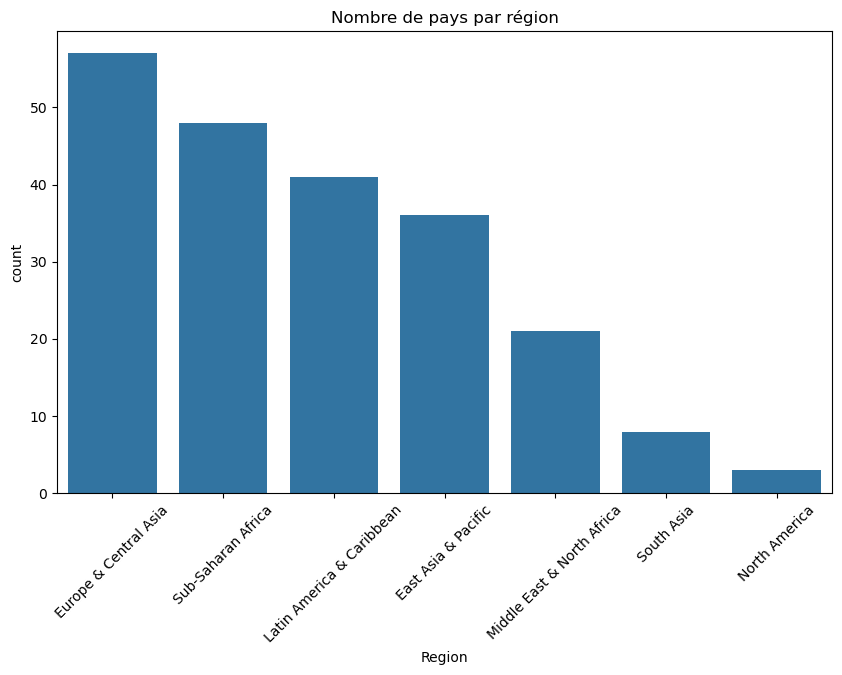

In [371]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Nombre de pays par région')
plt.xticks(rotation=45)
plt.show()

#### Donnée 2 EdStatsCountry-Series.csv

##### 1.Définir ce que représente une ligne du fichier

In [372]:
df2.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [373]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


Se qu'on l'on observe
- **Nombre de lignes :** 613  
- **Nombre de colonnes :** 4  

**Colonnes :**  
- `CountryCode` : complète, type texte (`object`)  
- `SeriesCode` : complète, type texte (`object`)  
- `DESCRIPTION` : complète, type texte (`object`)  
- `Unnamed: 3` : entièrement vide (0 valeurs), type numérique (`float64`)  



##### 2.Calculer le nombre de ligne et de colonne

In [374]:
print("Dimensions :", df2.shape)

Dimensions : (613, 4)


##### 3.Identifier et compter les doublons

In [375]:
# Affiche un booléen pour chaque ligne : True si la ligne est un doublon
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
608    False
609    False
610    False
611    False
612    False
Length: 613, dtype: bool

In [376]:
print("Doublons :", df2.duplicated().sum())

Doublons : 0


##### 4 .Supprimer les doublons

Dans la jeu de donnée EdStatsCountry-Series.csv il n'y a pas de doublon donc aucun a supprimer 

##### 5 .Calculer la proportion de valeurs manquantes par colonne

In [377]:
print("Valeurs manquantes (%) :")
print(df2.isnull().mean() * 100)

Valeurs manquantes (%) :
CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64


##### 6.Supprimer les colonnes inutilisables

In [378]:
# Suppression des colonnes avec plus de 20 % de valeurs manquantes
df2 = df2.dropna(thresh=df2.shape[0] * 0.8, axis=1)

# Affichage des valeurs manquantes restantes
print(df2.isnull().sum())
print(df2.shape)

# Sauvegarde du dataset nettoyé
df2.to_csv("EdStatsCountry-Series_clean.csv", index=False)


CountryCode    0
SeriesCode     0
DESCRIPTION    0
dtype: int64
(613, 3)


##### 7.Pour les colonnes numériques

In [379]:
df2.describe()

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


##### 8.Pour les colonnes catégorielles

In [380]:
for col in df2.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df2[col].value_counts(dropna=False))
    print("\n")

--- CountryCode ---
CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
       ..
GRL     2
GTM     2
GUM     2
HKG     2
ZWE     2
Name: count, Length: 211, dtype: int64


--- SeriesCode ---
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64


--- DESCRIPTION ---
DESCRIPTION
Data sources : United Nations World Population Prospects                                                                                     154
Data sources: United Nations World Population Prospects  

##### Le visuel 

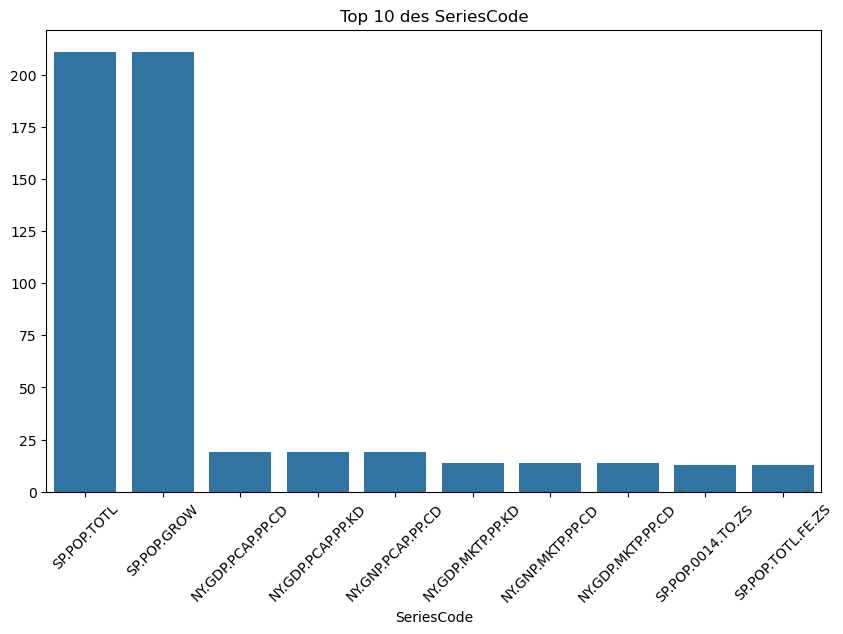

In [381]:
top_series = df2['SeriesCode'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_series.index, y=top_series.values)
plt.title("Top 10 des SeriesCode")
plt.xticks(rotation=45)
plt.show()

#### Donnée 3 EdStatsData.csv

##### 1.Définir ce que représente une ligne du fichier

In [382]:
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

##### 2.Calculer le nombre de ligne et de colonne

In [384]:
print("Dimensions :", df3.shape)

Dimensions : (886930, 70)


##### 3.Identifier et compter les doublons

In [385]:
# Affiche un booléen pour chaque ligne : True si la ligne est un doublon
df3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
886925    False
886926    False
886927    False
886928    False
886929    False
Length: 886930, dtype: bool

In [386]:
print("Doublons :", df3.duplicated().sum())

Doublons : 0


##### 4 .Supprimer les doublons

Dans la jeu de donnée EdStatsData.csv il n'y a pas de doublon donc aucun a supprimer 

##### 5 .Calculer la proportion de valeurs manquantes par colonne

In [387]:
print("Valeurs manquantes (%) :")
print(df3.isnull().mean() * 100)

Valeurs manquantes (%) :
Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64


##### 6.Supprimer les colonnes inutilisables

In [388]:
# Supprimer les colonnes trop vides (par exemple moins de 1% de données)
df3 = df3.dropna(axis=1, how='all')

# Vérification
print(df3.isnull().sum())
print(df3.shape)

# Sauvegarde du dataset nettoyé
df3.to_csv("EdStatsData_clean.csv", index=False)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2080              835494
2085              835494
2090              835494
2095              835494
2100              835494
Length: 69, dtype: int64
(886930, 69)


##### 7.Pour les colonnes numériques

In [389]:
df3.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06


##### 8.Pour les colonnes catégorielles

In [390]:
for col in df3.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df3[col].value_counts(dropna=False))
    print("\n")

--- Country Name ---
Country Name
Arab World               3665
Portugal                 3665
Micronesia, Fed. Sts.    3665
Moldova                  3665
Monaco                   3665
                         ... 
Equatorial Guinea        3665
Eritrea                  3665
Estonia                  3665
Ethiopia                 3665
Zimbabwe                 3665
Name: count, Length: 242, dtype: int64


--- Country Code ---
Country Code
ARB    3665
PRT    3665
FSM    3665
MDA    3665
MCO    3665
       ... 
GNQ    3665
ERI    3665
EST    3665
ETH    3665
ZWE    3665
Name: count, Length: 242, dtype: int64


--- Indicator Name ---
Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)                                       242
Population, ages 10-18, female                                                                     242
Population, ages 10-18, total                                                                      242
Population, ages 11-15, female           

##### le Visuel

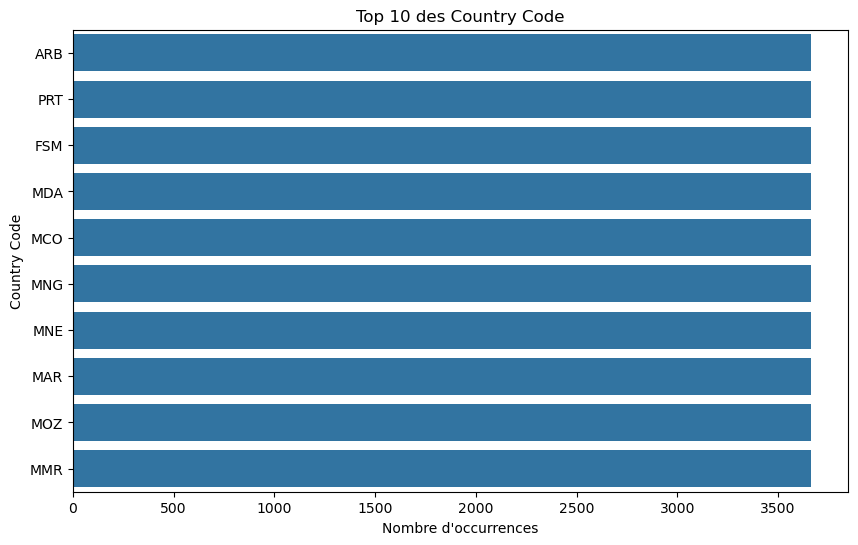

In [391]:
# Top 10 des Indicator Code
top_series = df3['Indicator Code'].value_counts().head(10)

country_code_counts = df3['Country Code'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_code_counts.values, y=country_code_counts.index)
plt.title("Top 10 des Country Code")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Country Code")
plt.show()

#### Donnée 4 EdStatsFootNote.csv

##### 1.Définir ce que représente une ligne du fichier

In [392]:
df4.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [393]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


##### 2.Calculer le nombre de ligne et de colonne

In [394]:
print("Dimensions :", df4.shape)

Dimensions : (643638, 5)


##### 3.Identifier et compter les doublons

In [395]:
# Affiche un booléen pour chaque ligne : True si la ligne est un doublon
df4.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
643633    False
643634    False
643635    False
643636    False
643637    False
Length: 643638, dtype: bool

In [396]:
print("Doublons :", df4.duplicated().sum())

Doublons : 0


##### 4 .Supprimer les doublons

Dans la jeu de donnée EdStatsFootNote.csv il n'y a pas de doublon donc aucun a supprimer 

##### 5 .Calculer la proportion de valeurs manquantes par colonne

In [397]:
print("Valeurs manquantes (%) :")
print(df4.isnull().mean() * 100)

Valeurs manquantes (%) :
CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64


##### 6.Supprimer les colonnes inutilisables

In [398]:
df4 = df4.dropna(thresh=len(df4)*0.8, axis=1)
print(df4.isnull().sum())
print(df4.shape)

# Sauvegarde du dataset nettoyé
df4.to_csv("EdStatsFootNote_clean.csv", index=False)

CountryCode    0
SeriesCode     0
Year           0
DESCRIPTION    0
dtype: int64
(643638, 4)


##### 7.Pour les colonnes numériques

In [399]:
df4.describe()

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


##### 8.Pour les colonnes catégorielles

In [400]:
for col in df4.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df4[col].value_counts(dropna=False))
    print("\n")

--- CountryCode ---
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64


--- SeriesCode ---
SeriesCode
SH.DYN.MORT                 9226
SE.PRM.AGES                 8771
SE.PRM.DURS                 8771
SE.SEC.DURS                 8619
SE.SEC.AGES                 8581
                            ... 
SABER.STD.ASS.GOAL1.LVL2       1
SABER.STD.ASS.GOAL2            1
SABER.STD.ASS.GOAL2.LVL1       1
SABER.STD.ASS.GOAL2.LVL2       1
UIS.XSPENDP.1.FDPUB.FNS        1
Name: count, Length: 1558, dtype: int64


--- Year ---
Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997

Le visuel 

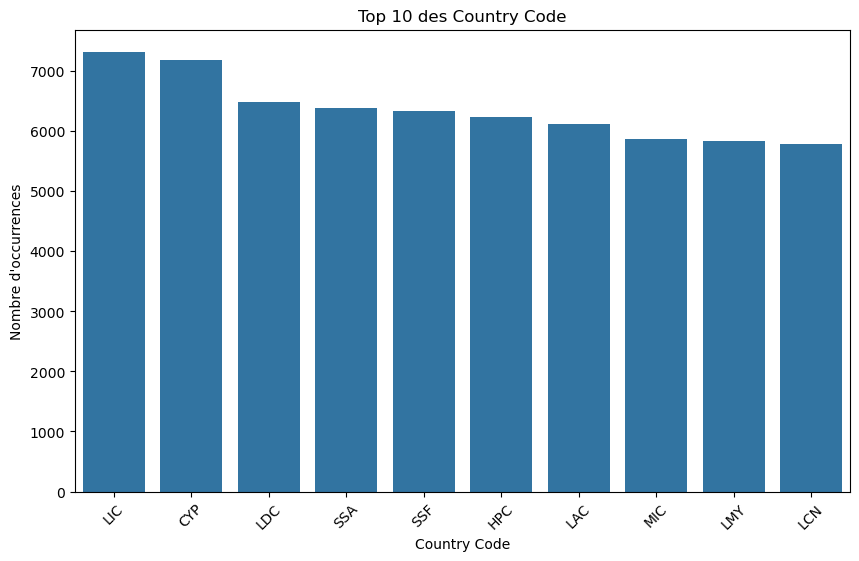

In [401]:
# Top 10 des Country 
top_series = df4['CountryCode'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_series.index, y=top_series.values)
plt.title("Top 10 des Country Code")
plt.xticks(rotation=45)
plt.ylabel("Nombre d'occurrences")
plt.xlabel("Country Code")
plt.show()

#### Donnée 5 EdStatsSeries.csv

##### 1.Définir ce que représente une ligne du fichier

In [402]:
df5.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [403]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

##### 2.Calculer le nombre de ligne et de colonne

In [404]:
print("Dimensions :", df5.shape)

Dimensions : (3665, 21)


##### 3.Identifier et compter les doublons

In [405]:
# Affiche un booléen pour chaque ligne : True si la ligne est un doublon
df5.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3660    False
3661    False
3662    False
3663    False
3664    False
Length: 3665, dtype: bool

In [406]:
print("Doublons :", df5.duplicated().sum())

Doublons : 0


##### 4 .Supprimer les doublons

Dans la jeu de donnée EdStatsSeries.csv il n'y a pas de doublon donc aucun a supprimer 

##### 5 .Calculer la proportion de valeurs manquantes par colonne

In [407]:
print("Valeurs manquantes (%) :")
print(df5.isnull().mean() * 100)

Valeurs manquantes (%) :
Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type             

##### 6.Supprimer les colonnes inutilisables

In [408]:
df5 = df5.dropna(thresh=len(df5)*0.8, axis=1)
print(df5.isnull().sum())
print(df5.shape)

# Sauvegarde du dataset nettoyé
df5.to_csv("EdStatsSeries_clean.csv", index=False)

Series Code        0
Topic              0
Indicator Name     0
Long definition    0
Source             0
dtype: int64
(3665, 5)


##### 7.Pour les colonnes numériques

In [409]:
df5.describe()

,Series Code,Topic,Indicator Name,Long definition,Source
count,3665,3665,3665,3665,3665
unique,3665,37,3665,2060,31
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,UNESCO Institute for Statistics
freq,1,1046,1,215,1269


##### 8.Pour les colonnes catégorielles

In [410]:
for col in df5.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df5[col].value_counts(dropna=False))
    print("\n")

--- Series Code ---
Series Code
BAR.NOED.1519.FE.ZS            1
SP.POP.0710.FE.UN              1
SP.POP.0710.TO.UN              1
SP.POP.0711.FE.UN              1
SP.POP.0711.MA.UN              1
                              ..
LO.PASEC.MAT5.LO.MA            1
LO.PASEC.MAT5.MA               1
LO.PASEC.REA.2                 1
LO.PASEC.REA.2.FE              1
XGDP.56.FSGOV.FDINSTADM.FFD    1
Name: count, Length: 3665, dtype: int64


--- Topic ---
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                            

Le visuel 

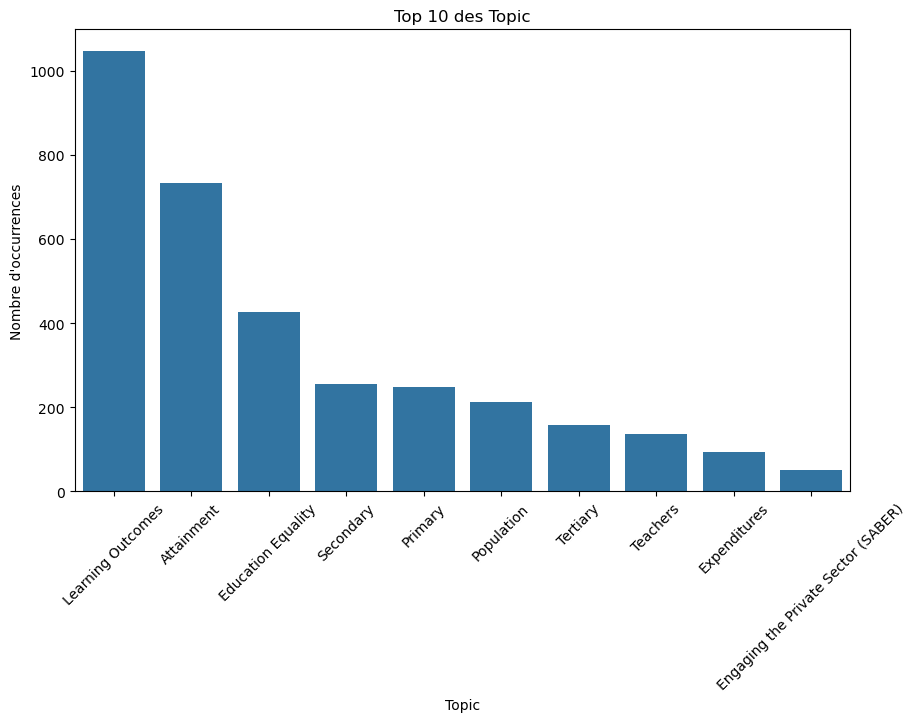

In [411]:
# Top 10 des Topic
top_series = df5['Topic'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_series.index, y=top_series.values)
plt.title("Top 10 des Topic")
plt.xticks(rotation=45)
plt.ylabel("Nombre d'occurrences")
plt.xlabel("Topic")
plt.show()

### Importation des jeux donnée nettoyer

In [156]:
df_cleanv1 = pd.read_csv("EdStatsCountry_clean.csv")
df_cleanv2 = pd.read_csv("EdStatsCountry-Series_clean.csv")
df_cleanv3 = pd.read_csv("EdStatsData_clean.csv")
df_cleanv4 = pd.read_csv("EdStatsFootNote_clean.csv")

### Étape 3 : Réalisez votre premier nettoyage

Dans cette étape, nous allons explorer et nettoyer les fichiers liés aux pays et aux séries de données.  
Nous allons identifier les faux pays, filtrer les lignes incorrectes et produire des dataframes cohérents entre eux.

**Voici ce qu'on va faire**
1. Examiner le fichier **Country** pour détecter les **faux pays**.
2. Supprimez **les lignes** correspondantes du dataframe contenant la donnée `Country`.
3. Pour les autres dataframes (`Country-Series`, `FootNote`, `Data`) :
   - Stocker les faux pays dans une liste et filtrer avec `isin()` **ou**
   - Utiliser un **inner join** avec le dataframe `Country` nettoyé.
5. Vérifier que les dataframes filtrés restent **cohérents** entre eux.
6. Sauvegarder les versions **nettoyées** des dataframes pour l’analyse suivante.


#### Donnée 1 EdStatsCountry.csv

##### Examiner le jeux donnée 

In [157]:
# afficher les 5 premières lignes
df_cleanv1.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),Country uses the 1993 System of National Accou...,Special trade system,1970
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,Country uses the 1968 System of National Accou...,Special trade system,2011. Population figures compiled from adminis...


##### La liste des pays 

In [158]:
df_cleanv1["Short Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


##### La liste des  faux pays

In [159]:
fake = df_cleanv1[(df_cleanv1["Region"].isna()) | (df_cleanv1["Region"] == "Aggregates")]
fake_countries_list = fake["Short Name"].tolist()
print("La Liste des faux pays", fake_countries_list)

La Liste des faux pays ['Arab World', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Euro area', 'European Union', 'Gibraltar', 'High income', 'Heavily indebted poor countries (HIPC)', 'Latin America & Caribbean (developing only)', 'Latin America & Caribbean (all income levels)', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income', 'Middle East & North Africa (all income levels)', 'Middle income', 'Middle East & North Africa (developing only)', 'North America', 'Nauru', 'OECD members', 'South Asia', 'Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa (all income levels)', 'Upper middle income', 'World']


##### Suppresion des faux pays dans le jeux donnée Country

Creation du jeux donnée des faux pays avec la suppresion 

In [160]:
fake_countries = fake[["Country Code", "Short Name", "Region"]]
fake_countries.to_csv("fake_countries.csv", index=False)

print("La liste des faux pays avec l'id :\n", fake_countries)

La liste des faux pays avec l'id :
     Country Code                                      Short Name Region
5            ARB                                      Arab World    NaN
57           EAP           East Asia & Pacific (developing only)    NaN
58           EAS         East Asia & Pacific (all income levels)    NaN
59           ECA         Europe & Central Asia (developing only)    NaN
60           ECS       Europe & Central Asia (all income levels)    NaN
63           EMU                                       Euro area    NaN
68           EUU                                  European Union    NaN
78           GIB                                       Gibraltar    NaN
89           HIC                                     High income    NaN
92           HPC          Heavily indebted poor countries (HIPC)    NaN
116          LAC     Latin America & Caribbean (developing only)    NaN
122          LCN   Latin America & Caribbean (all income levels)    NaN
123          LDC    Least de

Suppresion des faux pays 

In [198]:
# Créer le DataFrame nettoyé en excluant les faux pays
df_cleanedv1 = df_cleanv1[~df_cleanv1["Country Code"].isin(fake_countries["Country Code"])]

# Sauvegarder le DataFrame nettoyé dans un fichier CSV
df_cleanedv1.to_csv("EdStatsCountry_v2.csv", index=False)


In [199]:
# Vérifier s'il reste des faux pays
remaining_fakes = df_cleanedv1[df_cleanedv1["Country Code"].isin(fake_countries["Country Code"])]

print("Nombre de faux pays restant :", len(remaining_fakes))
print(remaining_fakes)

# Sauvegarder le nouveau dataset v2
remaining_fakes.to_csv("remaining_fakes.csv", index=False)

Nombre de faux pays restant : 0
Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Region, Income Group, WB-2 code, National accounts base year, SNA price valuation, System of National Accounts, System of trade, Latest population census]
Index: []


In [200]:
print(f"Lignes supprimées : {len(remaining_fakes) - len(remaining_fakes)}")

Lignes supprimées : 0


In [280]:
df_cleanedv1.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),Country uses the 1993 System of National Accou...,Special trade system,1970
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,Country uses the 1968 System of National Accou...,Special trade system,2011. Population figures compiled from adminis...


In [281]:
df_cleanv2.head()

,CountryCode,SeriesCode,DESCRIPTION,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979


#### Donnée 2 EdStatsCountry-Series.csv

In [271]:
print(df_cleanv2.columns.tolist())

['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'SNA price valuation', 'System of National Accounts', 'System of trade', 'Latest population census']


##### Methode a

In [272]:
# Charger la liste des faux pays
fake_countries = pd.read_csv("fake_countries.csv")

# Vérifier que la colonne existe
print(fake_countries.columns)

# Créer la liste des codes pays à exclure
fake_codes = fake_countries["Country Code"].to_list()

# Affichage pour vérification
print("La liste des faux pays :", fake_codes)

# Suppression des lignes avec faux pays
df_cleanv2 = df_cleanv2[~df_cleanv2["CountryCode"].isin(fake_codes)]

Index(['Country Code', 'Short Name', 'Region'], dtype='object')
La liste des faux pays : ['ARB', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'GIB', 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'MEA', 'MIC', 'MNA', 'NAC', 'NRU', 'OED', 'SAS', 'SSA', 'SSF', 'UMC', 'WLD']


In [273]:
# Vérifier s'il reste des faux pays
remaining_fakes = df_cleanv2[df_cleanv2["CountryCode"].isin(fake_countries["Country Code"])]
print("Nombre de faux pays restant :", len(remaining_fakes))
print(remaining_fakes)

Nombre de faux pays restant : 0
Empty DataFrame
Columns: [CountryCode, SeriesCode, DESCRIPTION, Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Region, Income Group, WB-2 code, National accounts base year, SNA price valuation, System of National Accounts, System of trade, Latest population census]
Index: []


In [274]:
df_cleanv2.head()

,CountryCode,SeriesCode,DESCRIPTION,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979


##### Methode b

In [294]:
# Chargement du Country-Series
df_cleanv2 = pd.read_csv("EdStatsCountry-Series_clean.csv")
fake_countries = pd.read_csv("Fake_Countries.csv")
# Chargement du fichier des faux pays
df_cleanedv1 = pd.read_csv("EdStatsCountry_v2.csv")


# Supprimer les espaces avant/après et mettre en majuscules
df_cleanv2["CountryCode"] = df_cleanv2["CountryCode"].str.strip().str.upper()
df_cleanedv1["Country Code"] = df_cleanedv1["Country Code"].str.strip().str.upper()
fake_countries["Country Code"] = fake_countries["Country Code"].str.strip().str.upper()

In [295]:
# 🔥 INNER JOIN : garder uniquement les lignes présentes dans les deux DataFrames
df_cleanv2 = df_cleanv2.merge(
    df_cleanedv1,
    left_on='CountryCode',
    right_on='Country Code',
    how='inner'
)

print("Nombre de lignes après INNER JOIN :", len(df_cleanv2))
df_cleanv2.head()

Nombre de lignes après INNER JOIN : 611


,CountryCode,SeriesCode,DESCRIPTION,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979


In [296]:
# Vérification qu'aucun faux pays n'est resté
remaining_fakes = df_cleanv2[df_cleanv2["CountryCode"].isin(fake_countries["Country Code"])]
print("Nombre de faux pays restant :", len(remaining_fakes))
# Sauvegarder le nouveau dataset v2
df_cleanv2.to_csv("EdStatsCountry-Series_v2.csv", index=False)

Nombre de faux pays restant : 0


#### Donnée 3 EdStatsCountry-Series.csv

In [268]:
df_cleanv3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979


In [269]:
print(df_cleanv3.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'SNA price valuation', 'System of National Accounts', 'System of trade', 'Latest population census']


##### Methode a

In [212]:
# Charger la liste des faux pays
fake_countries = pd.read_csv("fake_countries.csv")

# Vérifier que la colonne existe
print(fake_countries.columns)

# Créer la liste des codes pays à exclure
fake_codes = fake_countries["Country Code"].to_list()

# Affichage pour vérification
print("La liste des faux pays :", fake_codes)

# Suppression des lignes avec faux pays
df_cleanv3 = df_cleanv3[~df_cleanv3["Country Code"].isin(fake_codes)]

Index(['Country Code', 'Short Name', 'Region'], dtype='object')
La liste des faux pays : ['ARB', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'GIB', 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'MEA', 'MIC', 'MNA', 'NAC', 'NRU', 'OED', 'SAS', 'SSA', 'SSF', 'UMC', 'WLD']


In [213]:
# Vérifier s'il reste des faux pays
remaining_fakes = df_cleanv3[df_cleanv3["Country Code"].isin(fake_countries["Country Code"])]
print("Nombre de faux pays restant :", len(remaining_fakes))
print(remaining_fakes)

Nombre de faux pays restant : 0
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Region, Income Group, WB-2 code, National accounts base year, SNA price valuation, System of National Accounts, System of trade, Latest population census]
Index: []

[0 rows x 82 columns]


##### Methode b

In [228]:
# Chargement du Country-Series
df_cleanv3 = pd.read_csv("EdStatsData_clean.csv")
fake_countries = pd.read_csv("Fake_Countries.csv")
# Chargement du fichier des faux pays
df_cleanedv1 = pd.read_csv("EdStatsCountry_v2.csv")

In [229]:
# 🔥 INNER JOIN : garder uniquement les lignes présentes dans les deux DataFrames
df_cleanv3 = df_cleanv3.merge(
    df_cleanedv1,
    left_on='Country Code',
    right_on='Country Code',
    how='inner'
)

print("Nombre de lignes après INNER JOIN :", len(df_cleanv3))
df_cleanv3.head()

Nombre de lignes après INNER JOIN : 784310


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979


In [232]:
# Vérification qu'aucun faux pays n'est resté
remaining_fakes = df_cleanv3[df_cleanv3["Country Code"].isin(fake_countries["Country Code"])]
print("Nombre de faux pays restant :", len(remaining_fakes))

# Sauvegarder le nouveau dataset v2
df_cleanv3.to_csv("EdStatsData_v2.csv", index=False)

Nombre de faux pays restant : 0


#### Donnée 4 EdStatsFootNote.csv

In [58]:
df_cleanv4.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010


In [59]:
print(df_cleanv4.columns.tolist())

['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'SNA price valuation', 'System of National Accounts', 'System of trade', 'Latest population census']


##### Methode a

In [65]:
# Lecture de fake_countries
fake_countries = pd.read_csv("fake_countries.csv")

# Renommer pour avoir le même nom que df_cleanv4
fake_countries = fake_countries.rename(columns={"Country Code": "CountryCode"})

# Conversion en liste
fake_list = fake_countries["CountryCode"].tolist()

# Filtrer df_cleanv4 en supprimant les faux pays
df_cleanv4 = df_cleanv4[~df_cleanv4["CountryCode"].isin(fake_list)]


In [70]:
df_cleanv4 = df_cleanv4[~df_cleanv4["CountryCode"].isin(fake_codes)]

In [71]:
# Vérifier s'il reste des faux pays
remaining_fakes = df_cleanv4[df_cleanv4["CountryCode"].isin(fake_countries["CountryCode"])]
print("Nombre de faux pays restant :", len(remaining_fakes))
print(remaining_fakes)

Nombre de faux pays restant : 0
Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Region, Income Group, WB-2 code, National accounts base year, SNA price valuation, System of National Accounts, System of trade, Latest population census]
Index: []


In [72]:
df_cleanv4.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010


##### Methode b

In [300]:
# Chargement du Country-Series
df_cleanv4 = pd.read_csv("EdStatsFootNote_clean.csv")
fake_countries = pd.read_csv("Fake_Countries.csv")
# Chargement du fichier de la data nettoyer
df_cleanv1 = pd.read_csv("EdStatsCountry_v2.csv")

# Supprimer les espaces et mettre en majuscules
df_cleanv4["CountryCode"] = df_cleanv4["CountryCode"].str.strip().str.upper()
df_cleanv1["Country Code"] = df_cleanv1["Country Code"].str.strip().str.upper()
fake_countries["Country Code"] = fake_countries["Country Code"].str.strip().str.upper()


In [301]:
# 🔥 INNER JOIN : garder uniquement les lignes présentes dans les deux DataFrames
df_cleanv4 = df_cleanv4.merge(
    df_cleanv1,
    left_on='CountryCode',
    right_on='Country Code',
    how='inner'
)

# Nettoyage si tu veux retirer la colonne du merge
df_cleanv4 = df_cleanv4.drop(columns=['Country Code'])

print("Nombre de lignes après INNER JOIN :", len(df_cleanv4))
df_cleanv4.head()

Nombre de lignes après INNER JOIN : 515752


,CountryCode,SeriesCode,Year,DESCRIPTION,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010


In [303]:
# Vérification qu'aucun faux pays n'est resté
remaining_fakes = df_cleanv4[df_cleanv4["CountryCode"].isin(fake_countries["Country Code"])]
print("Nombre de faux pays restant :", len(remaining_fakes))
# Sauvegarder le nouveau dataset v2
df_cleanv4.to_csv("EdStatsFootNote_v2.csv", index=False)

Nombre de faux pays restant : 0


## Partie 2 [⬆️ Retour au sommaire](#Sommaire)

### Importation des jeux donnée mise a ajour 

In [345]:
df_v1 = pd.read_csv("EdStatsCountry_v2.csv",low_memory=False)
df_v2 = pd.read_csv("EdStatsCountry-Series_v2.csv",low_memory=False)
df_v3 = pd.read_csv("EdStatsData_v2.csv",low_memory=False)
df_v4 = pd.read_csv("EdStatsFootNote_v2.csv",low_memory=False)
df_v5 = pd.read_csv("EdStatsSeries_clean.csv",low_memory=False)

### Étape 1 : Réduisez le périmètre en utilisant une approche métier

En fonction des autre parties nous avons pu voir que les jeux données qui concerne le jeux donnée des topic et les années sont les jeux données de EdStatsSeries et EdStatsData 

In [305]:
df_v5.head()

,Series Code,Topic,Indicator Name,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


In [306]:
df_v5.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [307]:
df_v5['Topic'].value_counts()

Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                  

In [308]:
categories_a_garder = [
    "Learning Outcomes",
    "Attainment",
    "Education Equality",
    "Primary",
    "Secondary",
    "Tertiary",
    "Population",
    "Teachers",
    "Expenditures",
    "Literacy"
]

#### Filtrage

In [309]:
df_metier_filtre = df_v5[df_v5['Topic'].isin(categories_a_garder)]
# Sauvegarde du dataframe filtré par métier
df_metier_filtre.to_csv("EdStatsSeries_clean_v3.csv", index=False)

In [310]:
print("Avant filtrage :", df_v5.shape)
print("Après filtrage :", df_metier_filtre.shape)

Avant filtrage : (3665, 5)
Après filtrage : (3342, 5)


In [311]:
df_metier_filtre.head()

,Series Code,Topic,Indicator Name,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


#### Filtrons les autre jeux de données

In [312]:
print ("Colonne EdStatsCountry:",df_v1.columns)
print ("Colonne EdStatsCountry_Series:",df_v2.columns)
print ("Colonne EdStatsData:", df_v3.columns)
print ("Colonne FootNote:",df_v4.columns)

Colonne EdStatsCountry: Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'SNA price valuation',
       'System of National Accounts', 'System of trade',
       'Latest population census'],
      dtype='object')
Colonne EdStatsCountry_Series: Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Country Code',
       'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'SNA price valuation',
       'System of National Accounts', 'System of trade',
       'Latest population census'],
      dtype='object')
Colonne EdStatsData: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
  

#### Harmoniser les jeux donnée 

In [313]:
# Dans Series
df_v5 = df_v5.rename(columns={"SeriesCode": "IndicatorCode", "Series Code": "IndicatorCode"})

# Dans Data
df_v3 = df_v3.rename(columns={"Indicator Code": "IndicatorCode", "IndicatorCode": "IndicatorCode"})

# Dans Footnotes
df_v4 = df_v4.rename(columns={"SeriesCode": "IndicatorCode", "Series Code": "IndicatorCode"})


In [314]:
print ("Vérification apres harmonie:", df_v3.columns)
print ("Vérification apres harmonie:",df_v4.columns)

Vérification apres harmonie: Index(['Country Name', 'Country Code', 'Indicator Name', 'IndicatorCode',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'SNA price valuation',
       'System of National Accounts', 'System of trade',
       'Latest population census'],
      dtype='object')
Vérification apres harmon

In [315]:
indicateurs_gardes = set(df_metier_filtre['Series Code'])

In [316]:
df_metier_filtre.head()

,Series Code,Topic,Indicator Name,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


In [317]:
df_metier_filtre.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

#### filtrage du jeux donnée Data

In [318]:
df_v3_filtre = df_v3[df_v3['IndicatorCode'].isin(indicateurs_gardes)]

In [319]:
print("Data avant :", df_v3.shape)
print("Data après :", df_v3_filtre.shape)
# Sauvegarde du dataframe filtré par métier
df_v3_filtre.to_csv("EdStatsData_v3.csv", index=False)

Data avant : (784310, 82)
Data après : (704702, 82)


In [320]:
df_v4_filtre = df_v4[df_v4['IndicatorCode'].isin(indicateurs_gardes)]

In [321]:
print("Data avant :", df_v4.shape)
print("Data après :", df_v4_filtre.shape)
df_v4_filtre.to_csv("EdStatsFootNote_v3.csv", index=False)

Data avant : (515752, 17)
Data après : (448298, 17)


#### Année

*Pourquoi avons-nous des valeurs d’indicateur pour des années futures ?*

In [322]:
df_v3_filtre.head()

,Country Name,Country Code,Indicator Name,IndicatorCode,1970,1971,1972,1973,1974,1975,...,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979


In [323]:
# Identifier toutes les colonnes qui sont des années
annees_colonnes = [col for col in df_v3_filtre.columns if col.isdigit()]

# Affichage des années pour vérifier
print("Colonnes années détectées :", annees_colonnes)

Colonnes années détectées : ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']


Dans EdStatsData, certaines colonnes correspondent à des années (1970, 1971, …, 2100).

Les colonnes jusqu’en 2017 contiennent des données observées.

Les colonnes 2020 et suivantes sont des projections futures 

filter 

In [324]:
# Ne garder que les années observées (par exemple jusqu'à 2017)
annees_a_garder = list(map(str, np.arange(1970, 2018))) 

# Colonnes finales à garder : colonnes d'identité + années observées
colonnes_filtres = ['Country Name', 'Country Code', 'Indicator Name', 'IndicatorCode'] + annees_a_garder

# Filtrage du DataFrame
df_v3_filtre_annees = df_v3_filtre[colonnes_filtres]

# Vérification
print("Colonnes après filtrage :", df_v3_filtre_annees.columns)


Colonnes après filtrage : Index(['Country Name', 'Country Code', 'Indicator Name', 'IndicatorCode',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')


In [325]:
# Afficher les premières lignes
df_v3_filtre_annees.head()

,Country Name,Country Code,Indicator Name,IndicatorCode,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,NaN
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
df_v3_filtre_annees.to_csv("EdStatsData_filtre_annees.csv", index=False)

In [327]:
indicateurs_gardes = set(df_metier_filtre['Series Code'])
df_v3_filtre_final = df_v3_filtre_annees[df_v3_filtre_annees['IndicatorCode'].isin(indicateurs_gardes)]

print("Nombre de lignes après filtrage final :", df_v3_filtre_final.shape[0])

# -------------------------------
# 4️⃣ Sauvegarder le fichier final harmonisé
# -------------------------------
df_v3_filtre_final.to_csv("EdStatsData_filtre_harmonise.csv", index=False)

Nombre de lignes après filtrage final : 704702


### Importation des jeux donnée mise a ajour apres filtrage

In [328]:
df_v3_filtre_final.to_csv("EdStatsData_filtre_harmonise.csv")

### Étape 2 : Réduisez le périmètre en utilisant une approche data

In [329]:
df_v3_filtre_final.head()

,Country Name,Country Code,Indicator Name,IndicatorCode,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,NaN
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
df_v3_filtre_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'IndicatorCode',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [331]:
# Création d'une copie pour éviter le SettingWithCopyWarning
df_v3_filtre_final = df_v3_filtre_final.copy()

In [332]:
# Colonnes années
annees = [str(year) for year in range(1970, 2018)]

# S'assurer que les valeurs sont numériques
df_v3_filtre_final[annees] = df_v3_filtre_final[annees].apply(pd.to_numeric, errors='coerce')

# Proportion d'indicateurs renseignés par année
proportion_indicateurs_par_annee = df_v3_filtre_annees[annees].notna().sum() / len(df_v3_filtre_annees)
print("Proportion d'indicateurs renseignés par année :")
print(proportion_indicateurs_par_annee)

Proportion d'indicateurs renseignés par année :
1970    0.090804
1971    0.037024
1972    0.036925
1973    0.036607
1974    0.036862
1975    0.109805
1976    0.038882
1977    0.039080
1978    0.039043
1979    0.037832
1980    0.111697
1981    0.039898
1982    0.038344
1983    0.039604
1984    0.039625
1985    0.112480
1986    0.039953
1987    0.039099
1988    0.038971
1989    0.037387
1990    0.157587
1991    0.085589
1992    0.086852
1993    0.086889
1994    0.088487
1995    0.164640
1996    0.087115
1997    0.081545
1998    0.093681
1999    0.135863
2000    0.216855
2001    0.141263
2002    0.142130
2003    0.151505
2004    0.148578
2005    0.226887
2006    0.164887
2007    0.159704
2008    0.155481
2009    0.166062
2010    0.307527
2011    0.170600
2012    0.171728
2013    0.157564
2014    0.126845
2015    0.168284
2016    0.010473
2017    0.000000
dtype: float64


In [333]:
# Proportion d'années renseignées par indicateur
proportion_annees_par_indicateur = df_v3_filtre_final[annees].notna().sum(axis=1) / len(annees)
proportion_annees_par_indicateur = pd.DataFrame({
    'IndicatorCode': df_v3_filtre_final['IndicatorCode'],
    'ProportionAnneesRenseignees': proportion_annees_par_indicateur
})
print("\nProportion d'années renseignées par indicateur :")
print(proportion_annees_par_indicateur.sort_values(by='ProportionAnneesRenseignees', ascending=False))


Proportion d'années renseignées par indicateur :
              IndicatorCode  ProportionAnneesRenseignees
60324           SE.PRM.AGES                     0.979167
112262    SP.SEC.LTOT.FE.IN                     0.979167
38983     SP.SEC.UTOT.FE.IN                     0.979167
38984     SP.SEC.UTOT.MA.IN                     0.979167
112290  UIS.SAP.23.GPV.G1.M                     0.979167
...                     ...                          ...
473375       HH.DHS.NIR.1.F                     0.000000
473374         HH.DHS.NIR.1                     0.000000
473373      HH.DHS.NAR.23.U                     0.000000
473372      HH.DHS.NAR.23.R                     0.000000
208147        LO.SACMEQ.REA                     0.000000

[704702 rows x 2 columns]


In [334]:
seuil_indicateurs = 0.5
indicateurs_a_garder = proportion_annees_par_indicateur[
    proportion_annees_par_indicateur['ProportionAnneesRenseignees'] >= seuil_indicateurs
]['IndicatorCode'].tolist()

seuil_annees = 0.05
annees_a_garder = proportion_indicateurs_par_annee[
    proportion_indicateurs_par_annee >= seuil_annees
].index.tolist()

df_reduit = df_v3_filtre_final[df_v3_filtre_final['IndicatorCode'].isin(indicateurs_a_garder)][['Country Name','Country Code','IndicatorCode'] + annees_a_garder]

In [335]:
nb_pays_par_indicateur_annee = (
    df_reduit.groupby('IndicatorCode')[annees_a_garder]
    .apply(lambda x: x.notna().sum())
    .reset_index()
    .melt(id_vars='IndicatorCode', var_name='Annee', value_name='NbPaysRenseignes')
)


In [336]:
indicateurs_riches = nb_pays_par_indicateur_annee.groupby('IndicatorCode')['NbPaysRenseignes'].mean().reset_index()
indicateurs_riches = indicateurs_riches.sort_values(by='NbPaysRenseignes', ascending=False)
top15_indicateurs = indicateurs_riches.head(15)
print(top15_indicateurs)


         IndicatorCode  NbPaysRenseignes
15         SE.PRM.DURS        203.566667
8          SE.PRM.AGES        203.566667
50      SE.SEC.DURS.UP        201.166667
45         SE.SEC.AGES        201.166667
49         SE.SEC.DURS        199.866667
276  SP.PRE.TOTL.FE.IN        190.633333
277     SP.PRE.TOTL.IN        190.633333
278  SP.PRE.TOTL.MA.IN        190.633333
293  SP.SEC.UTOT.MA.IN        190.600000
292     SP.SEC.UTOT.IN        190.600000
291  SP.SEC.UTOT.FE.IN        190.600000
286     SP.SEC.LTOT.IN        190.533333
287  SP.SEC.LTOT.MA.IN        190.533333
285  SP.SEC.LTOT.FE.IN        190.533333
288  SP.SEC.TOTL.FE.IN        190.433333


 #### réduisez le nombre d’années et d’indicateurs pour garder celles et ceux qui sont les plus riches en données

In [496]:
nb_pays_par_indicateur_annee = (
    df_v3_filtre_final.groupby('IndicatorCode')[annees]
    .apply(lambda x: x.notna().sum())
    .reset_index()
    .melt(id_vars='IndicatorCode', var_name='Annee', value_name='NbPaysRenseignes')
)


In [497]:
indicateurs_riches = nb_pays_par_indicateur_annee.groupby('IndicatorCode')['NbPaysRenseignes'].mean().reset_index()
indicateurs_riches = indicateurs_riches.sort_values(by='NbPaysRenseignes', ascending=False)
top15_indicateurs = indicateurs_riches.head(15)
print(top15_indicateurs)


          IndicatorCode  NbPaysRenseignes
2005        SE.PRM.DURS        197.666667
1995        SE.PRM.AGES        197.666667
2047        SE.SEC.AGES        195.208333
2052     SE.SEC.DURS.UP        195.208333
2051        SE.SEC.DURS        194.166667
2322  SP.PRE.TOTL.MA.IN        185.375000
2321     SP.PRE.TOTL.IN        185.375000
2320  SP.PRE.TOTL.FE.IN        185.375000
2336     SP.SEC.UTOT.IN        185.041667
2337  SP.SEC.UTOT.MA.IN        185.041667
2335  SP.SEC.UTOT.FE.IN        185.041667
2330     SP.SEC.LTOT.IN        185.000000
2329  SP.SEC.LTOT.FE.IN        185.000000
2331  SP.SEC.LTOT.MA.IN        185.000000
3121  UIS.SAP.23.GPV.G1        184.958333


In [498]:
df_reduit.to_csv("df_reduit.csv", index=False)

### Étape 3 : Consolidez vos résultats dans un dataframe (pays, indicateurs)  

In [499]:
df_reduit.head()

,Country Name,Country Code,IndicatorCode,1970,1975,1980,1985,1990,1991,1992,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN
1,Afghanistan,AFG,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN
2,Afghanistan,AFG,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN
3,Afghanistan,AFG,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN
6,Afghanistan,AFG,UIS.NERA.1.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
df_reduit['IndicatorCode'].nunique()

573

In [501]:
len([col for col in df_reduit.columns if col.isdigit()])


30

In [504]:
df_reduit.dropna(how="all", subset=annees_a_garder).shape


(102489, 33)

Agreger

In [337]:
df_long = df_reduit.melt(
    id_vars=["Country Name", "Country Code", "IndicatorCode"],
    var_name="Year",
    value_name="Value"
)


In [338]:
df_final = df_long.pivot_table(
    index=["Country Name", "Country Code"],
    columns="IndicatorCode",
    values="Value",
    aggfunc="mean"     # moyenne par pays et indicateur
).reset_index()


In [339]:
df_final.to_csv("df_final_pays_indicateurs.csv", index=False)

In [340]:
df_final.head()

IndicatorCode,Country Name,Country Code,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.ENRL.TC.ZS,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRE.TCHR.FE.ZS,...,UIS.SR.1.G4.GPI,UIS.SR.1.G4.M,UIS.SR.1.G5.GPI,UIS.SR.2.GPV.GLAST.CP.F,UIS.SR.2.GPV.GLAST.CP.M,UIS.SR.2.GPV.GLAST.CP.T,UIS.SR.2.GPV.GLAST.GPI,UIS.TE_100000.56,UIS.TE_100000.56.F,UIS.TE_100000.56.M
0,Afghanistan,AFG,0.478592,0.495640,0.387350,0.278444,16.405874,946.000000,946.000000,100.000000,...,0.935833,75.788274,0.911183,85.301511,70.193914,73.527903,1.261127,265.307307,115.298608,406.971427
1,Albania,ALB,0.980801,0.968842,0.963535,1.308685,19.847925,4315.678571,4319.777778,100.000000,...,1.020362,94.318862,1.009027,94.146584,93.460246,93.794813,1.008023,2221.004970,2520.477363,1924.087233
2,Algeria,DZA,0.892237,0.910487,0.935917,1.399763,25.438810,5678.588235,4322.529412,82.662235,...,0.994528,94.362716,0.993962,79.755812,69.802041,74.699851,1.151674,2085.843401,3358.597168,2446.522534
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,107.250000,106.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1.077380,1.148370,1.138920,NaN,13.619268,183.785714,169.285714,92.052485,...,0.990109,97.152364,0.990015,84.950199,79.450096,82.051251,1.071559,NaN,NaN,NaN


In [341]:
df_final.shape


(208, 575)

In [342]:
df_final.isna().mean().sort_values()


IndicatorCode
Country Name         0.000000
Country Code         0.000000
SE.SEC.ENRL          0.004808
SE.PRM.ENRL          0.004808
SE.PRM.AGES          0.004808
                       ...   
UIS.DR.1.G6.M        0.884615
UIS.DR.1.G6.F        0.884615
UIS.DR.2.GPV.G4.T    0.889423
UIS.DR.2.GPV.G4.F    0.899038
UIS.DR.2.GPV.G4.M    0.899038
Length: 575, dtype: float64

In [343]:
df_final[df_final["Country Name"] == "France"]


IndicatorCode,Country Name,Country Code,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.ENRL.TC.ZS,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRE.TCHR.FE.ZS,...,UIS.SR.1.G4.GPI,UIS.SR.1.G4.M,UIS.SR.1.G5.GPI,UIS.SR.2.GPV.GLAST.CP.F,UIS.SR.2.GPV.GLAST.CP.M,UIS.SR.2.GPV.GLAST.CP.T,UIS.SR.2.GPV.GLAST.GPI,UIS.TE_100000.56,UIS.TE_100000.56.F,UIS.TE_100000.56.M
64,France,FRA,0.989056,1.005047,1.017861,1.222346,20.208656,126241.162891,102315.526316,80.54792,...,NaN,NaN,NaN,99.215327,95.997428,90.900024,1.036889,3309.892761,3574.988254,3138.027904


## Partie 3 [⬆️ Retour au sommaire](#Sommaire)

In [346]:
df_final= pd.read_csv("df_final_pays_indicateurs.csv")

### Étape 1 : Identifiez les indicateurs redondants d’un point de vue statistique

In [347]:
df_final.head()

,Country Name,Country Code,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.ENRL.TC.ZS,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRE.TCHR.FE.ZS,...,UIS.SR.1.G4.GPI,UIS.SR.1.G4.M,UIS.SR.1.G5.GPI,UIS.SR.2.GPV.GLAST.CP.F,UIS.SR.2.GPV.GLAST.CP.M,UIS.SR.2.GPV.GLAST.CP.T,UIS.SR.2.GPV.GLAST.GPI,UIS.TE_100000.56,UIS.TE_100000.56.F,UIS.TE_100000.56.M
0,Afghanistan,AFG,0.478592,0.495640,0.387350,0.278444,16.405874,946.000000,946.000000,100.000000,...,0.935833,75.788274,0.911183,85.301511,70.193914,73.527903,1.261127,265.307307,115.298608,406.971427
1,Albania,ALB,0.980801,0.968842,0.963535,1.308685,19.847925,4315.678571,4319.777778,100.000000,...,1.020362,94.318862,1.009027,94.146584,93.460246,93.794813,1.008023,2221.004970,2520.477363,1924.087233
2,Algeria,DZA,0.892237,0.910487,0.935917,1.399763,25.438810,5678.588235,4322.529412,82.662235,...,0.994528,94.362716,0.993962,79.755812,69.802041,74.699851,1.151674,2085.843401,3358.597168,2446.522534
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,107.250000,106.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1.077380,1.148370,1.138920,NaN,13.619268,183.785714,169.285714,92.052485,...,0.990109,97.152364,0.990015,84.950199,79.450096,82.051251,1.071559,NaN,NaN,NaN


In [348]:
# Sélection des indicateurs numériques uniquement
indicators = df_final.select_dtypes(include=[np.number])

print("Nombre d'indicateurs numériques :", indicators.shape[1])
indicators.head()

Nombre d'indicateurs numériques : 573


,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.ENRL.TC.ZS,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRE.TCHR.FE.ZS,SE.PRM.AGES,SE.PRM.CMPT.FE.ZS,...,UIS.SR.1.G4.GPI,UIS.SR.1.G4.M,UIS.SR.1.G5.GPI,UIS.SR.2.GPV.GLAST.CP.F,UIS.SR.2.GPV.GLAST.CP.M,UIS.SR.2.GPV.GLAST.CP.T,UIS.SR.2.GPV.GLAST.GPI,UIS.TE_100000.56,UIS.TE_100000.56.F,UIS.TE_100000.56.M
0,0.478592,0.495640,0.387350,0.278444,16.405874,946.000000,946.000000,100.000000,6.966667,11.842090,...,0.935833,75.788274,0.911183,85.301511,70.193914,73.527903,1.261127,265.307307,115.298608,406.971427
1,0.980801,0.968842,0.963535,1.308685,19.847925,4315.678571,4319.777778,100.000000,6.000000,96.905803,...,1.020362,94.318862,1.009027,94.146584,93.460246,93.794813,1.008023,2221.004970,2520.477363,1924.087233
2,0.892237,0.910487,0.935917,1.399763,25.438810,5678.588235,4322.529412,82.662235,6.000000,84.227244,...,0.994528,94.362716,0.993962,79.755812,69.802041,74.699851,1.151674,2085.843401,3358.597168,2446.522534
3,NaN,NaN,NaN,NaN,NaN,107.250000,106.500000,NaN,6.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.077380,1.148370,1.138920,NaN,13.619268,183.785714,169.285714,92.052485,6.000000,NaN,...,0.990109,97.152364,0.990015,84.950199,79.450096,82.051251,1.071559,NaN,NaN,NaN


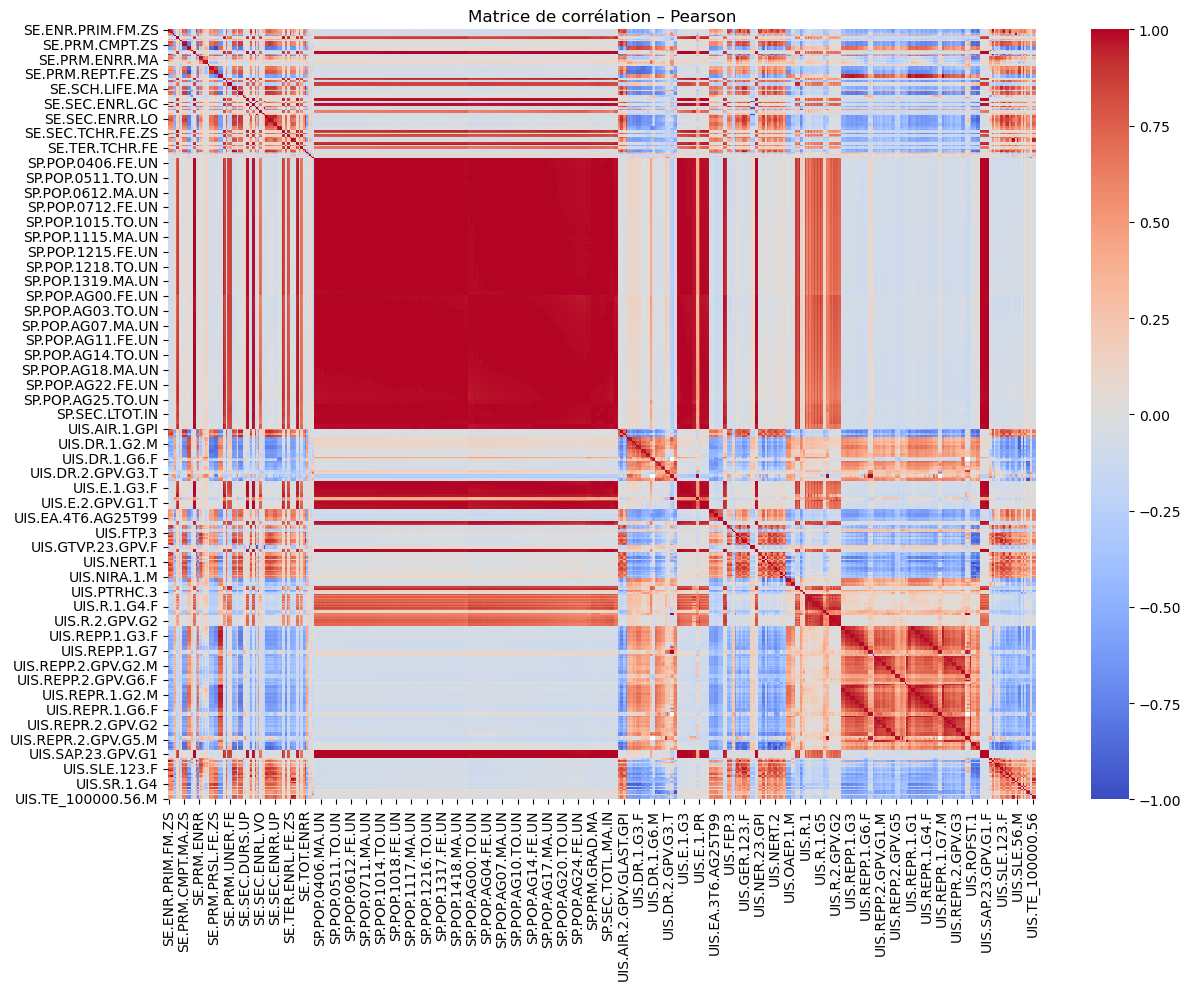

In [350]:
corr_pearson = indicators.corr(method="pearson")
plt.figure(figsize=(14,10))
sns.heatmap(corr_pearson, cmap="coolwarm", center=0, annot=False)
plt.title("Matrice de corrélation – Pearson")
plt.show()

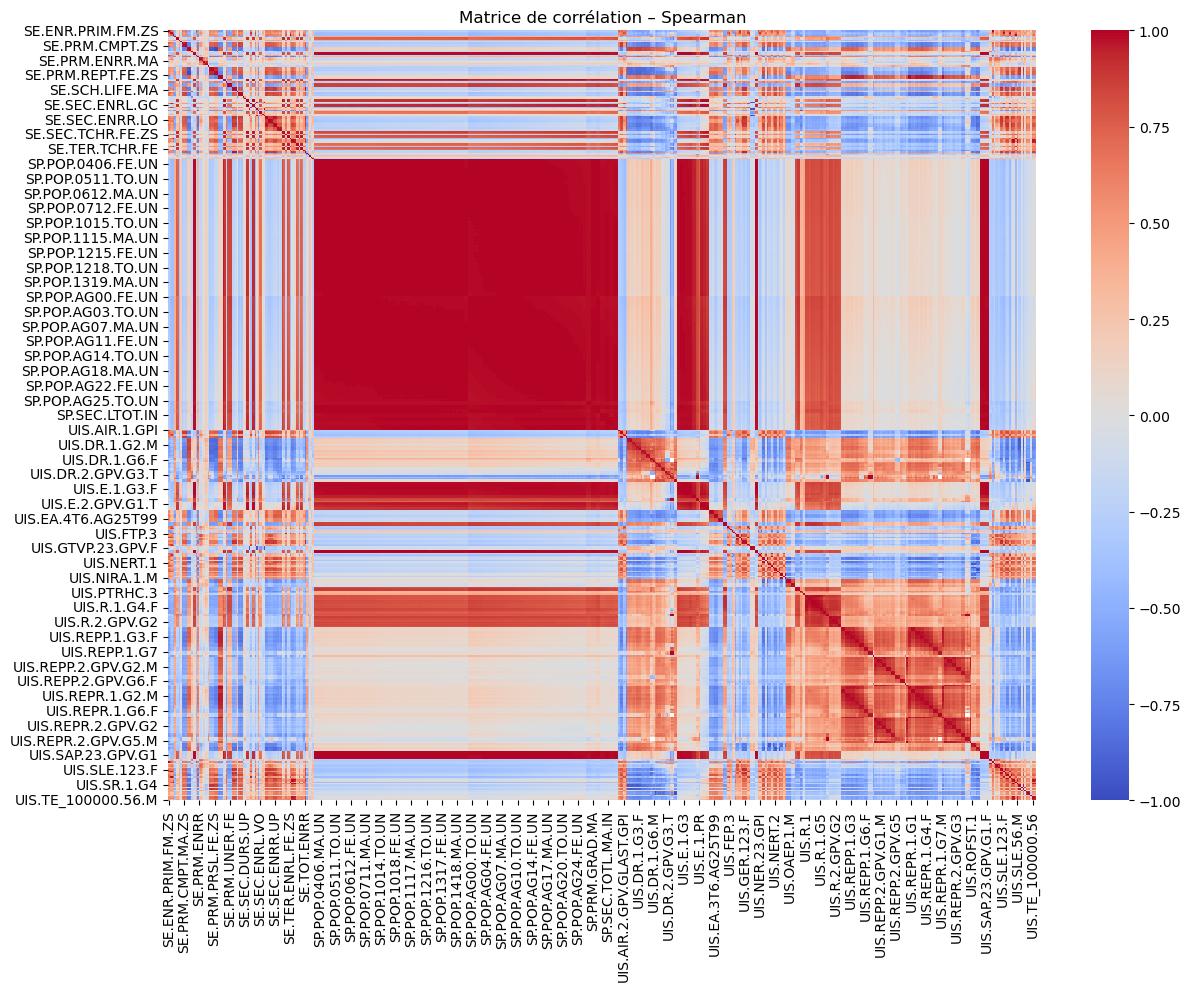

In [351]:
corr_spearman = indicators.corr(method="spearman")

plt.figure(figsize=(14,10))
sns.heatmap(corr_spearman, cmap="coolwarm", center=0, annot=False)
plt.title("Matrice de corrélation – Spearman")
plt.show()


In [352]:
diff = corr_pearson - corr_spearman

print("Différence moyenne absolue :", diff.abs().mean().mean())
print("Différence maximale :", diff.abs().max().max())


Différence moyenne absolue : 0.11518703086088407
Différence maximale : 0.821428332157824


In [353]:
# Seuil de corrélation
threshold = 0.70

# Matrice de corrélation Pearson
corr_pearson = indicators.corr(method="pearson")

# On récupère uniquement la partie triangulaire supérieure (pour éviter les doublons)
upper = corr_pearson.where(np.triu(np.ones(corr_pearson.shape), k=1).astype(bool))

# Liste des colonnes à supprimer
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print("Nombre d'indicateurs supprimés :", len(to_drop))
print("Liste des indicateurs supprimés :")
to_drop

Nombre d'indicateurs supprimés : 544
Liste des indicateurs supprimés :


['SE.ENR.PRSC.FM.ZS',
 'SE.ENR.SECO.FM.ZS',
 'SE.PRE.TCHR.FE',
 'SE.PRM.CMPT.FE.ZS',
 'SE.PRM.CMPT.MA.ZS',
 'SE.PRM.CMPT.ZS',
 'SE.PRM.DROP.FE.ZS',
 'SE.PRM.DROP.MA.ZS',
 'SE.PRM.DROP.ZS',
 'SE.PRM.ENRL',
 'SE.PRM.ENRL.FE',
 'SE.PRM.ENRL.FE.ZS',
 'SE.PRM.ENRL.TC.ZS',
 'SE.PRM.ENRR.FE',
 'SE.PRM.ENRR.MA',
 'SE.PRM.GINT.MA.ZS',
 'SE.PRM.GINT.ZS',
 'SE.PRM.PRS5.FE.ZS',
 'SE.PRM.PRS5.MA.ZS',
 'SE.PRM.PRS5.ZS',
 'SE.PRM.PRSL.FE.ZS',
 'SE.PRM.PRSL.MA.ZS',
 'SE.PRM.PRSL.ZS',
 'SE.PRM.REPT.FE.ZS',
 'SE.PRM.REPT.MA.ZS',
 'SE.PRM.REPT.ZS',
 'SE.PRM.TCHR',
 'SE.PRM.TCHR.FE',
 'SE.PRM.TCHR.FE.ZS',
 'SE.PRM.UNER',
 'SE.PRM.UNER.FE',
 'SE.PRM.UNER.MA',
 'SE.SCH.LIFE',
 'SE.SCH.LIFE.FE',
 'SE.SCH.LIFE.MA',
 'SE.SEC.AGES',
 'SE.SEC.CMPT.LO.FE.ZS',
 'SE.SEC.CMPT.LO.MA.ZS',
 'SE.SEC.CMPT.LO.ZS',
 'SE.SEC.ENRL',
 'SE.SEC.ENRL.FE',
 'SE.SEC.ENRL.FE.ZS',
 'SE.SEC.ENRL.GC',
 'SE.SEC.ENRL.GC.FE',
 'SE.SEC.ENRL.GC.FE.ZS',
 'SE.SEC.ENRL.MA.VO.ZS',
 'SE.SEC.ENRL.TC.ZS',
 'SE.SEC.ENRL.VO',
 'SE.SEC.ENRL.VO.FE',


In [360]:
df_final.to_csv("df_final_v1.csv", index=False)

In [361]:
df_final_v1 = pd.read_csv("df_final_v1.csv")
df_final_v1.head()


,Country Name,Country Code,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.ENRL.TC.ZS,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRE.TCHR.FE.ZS,...,UIS.SR.1.G4.GPI,UIS.SR.1.G4.M,UIS.SR.1.G5.GPI,UIS.SR.2.GPV.GLAST.CP.F,UIS.SR.2.GPV.GLAST.CP.M,UIS.SR.2.GPV.GLAST.CP.T,UIS.SR.2.GPV.GLAST.GPI,UIS.TE_100000.56,UIS.TE_100000.56.F,UIS.TE_100000.56.M
0,Afghanistan,AFG,0.478592,0.495640,0.387350,0.278444,16.405874,946.000000,946.000000,100.000000,...,0.935833,75.788274,0.911183,85.301511,70.193914,73.527903,1.261127,265.307307,115.298608,406.971427
1,Albania,ALB,0.980801,0.968842,0.963535,1.308685,19.847925,4315.678571,4319.777778,100.000000,...,1.020362,94.318862,1.009027,94.146584,93.460246,93.794813,1.008023,2221.004970,2520.477363,1924.087233
2,Algeria,DZA,0.892237,0.910487,0.935917,1.399763,25.438810,5678.588235,4322.529412,82.662235,...,0.994528,94.362716,0.993962,79.755812,69.802041,74.699851,1.151674,2085.843401,3358.597168,2446.522534
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,107.250000,106.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1.077380,1.148370,1.138920,NaN,13.619268,183.785714,169.285714,92.052485,...,0.990109,97.152364,0.990015,84.950199,79.450096,82.051251,1.071559,NaN,NaN,NaN


### Étape 2 : Analysez vos indicateurs restants et formulez une liste de pays pertinents pour l’implantation d’une academy

### Étape 3 : Formalisez vos résultats

### Étape 4 : Rendez vos analyses et vos résultats reproductibles par vos collègues